In [1]:
!pip install scikit-learn --quiet
from google.colab import files
from google.colab import drive
import numpy as np
import pandas as pd
import random
import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#connect to Drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/resume_scorer.csv'
dataset = pd.read_csv(file_path)

Mounted at /content/drive


In [3]:
#Generate dataset
random.seed(42)
np.random.seed(42)

#Generate random start date for Role 1
month_1 = [random.randint(1, 12) for _ in range(3995)]
year_1 = [random.randint(2020, 2023) for _ in range(3995)]
date_1 = [datetime.datetime(year, month, 1) for year, month in zip(year_1, month_1)]

unique_roles = pd.unique(np.concatenate([dataset['Role 1'], dataset['Role 2'], dataset['Role 3']]))

sample = pd.DataFrame({"Applicant ID" : np.arange(6,4001,1),
                     "School Name"  : [random.choice(dataset['School Name'].unique()) for _ in range(3995)],
                      "GPA" : [round(val, 2) for val in np.random.normal(2.8, 0.4, 3995)],
                      "Degree": [random.choice(['Bachelors','Masters','Phd']) for _ in range(3995)],
                      "Location": [random.choice(dataset['Location'].unique()) for _ in range(3995)],
                      "Gender": [random.choice(['M','F','N/A']) for _ in range(3995)],
                      "Veteran status": [random.choice([0,1,'N/A']) for _ in range(3995)],
                      "Work authorization": [random.choice([0,1]) for _ in range(3995)],
                      "Disability": [random.choice([0,1,'N/A']) for _ in range(3995)],
                      "Ethnicity": [random.choice([0,1,2,3,4]) for _ in range(3995)],
                      "Role 1": [random.choice(dataset['Role 1'].unique()) for _ in range(3995)],
                      "Start 1": date_1,
                      "End 1": None,
                       "Role 2": [np.random.choice(unique_roles) for _ in range(3995)],
                      "Start 2": None,
                      "End 2": None,
                       "Role 3": None,
                      "Start 3": None,
                      "End 3": None,
                     })

#Ensure dates are in chronological order
for i in range(3995):
  sample.at[i, 'End 1'] = random.choice([sample['Start 1'][i]+relativedelta(months=random.randint(1, 12)),np.nan])

  if pd.notnull(sample['Role 2'][i]) == True:
    sample.at[i, 'Start 2'] = sample['Start 1'][i]+relativedelta(months=-random.randint(6, 12))
    sample.at[i, 'End 2'] = sample['Start 1'][i]+relativedelta(months=-random.randint(1, 5))
    sample.at[i, 'Role 3'] = np.random.choice(unique_roles)
  else:
    sample.at[i, 'Start 2'] = np.nan
    sample.at[i, 'End 2'] = np.nan
    sample.at[i, 'Role 3'] = np.nan
    sample.at[i, 'Start 3'] = np.nan
    sample.at[i, 'End 3'] = np.nan

  if pd.notnull(sample['Role 3'][i]) == True:
      sample.at[i, 'Start 3'] = sample['Start 1'][i]+relativedelta(months=-random.randint(12, 18))
      sample.at[i, 'End 3'] = sample['Start 1'][i]+relativedelta(months=-random.randint(6, 12))
  else:
      sample.at[i, 'Start 3'] = np.nan
      sample.at[i, 'End 3'] = np.nan

print(sample.head())

   Applicant ID                  School Name   GPA   Degree     Location  \
0             6            Providence School  3.00      Phd        Miami   
1             7            Providence School  2.74  Masters        Miami   
2             8     State Providence College  3.06      Phd  Los Angeles   
3             9  Providence State University  3.41      Phd       Boston   
4            10     State Providence College  2.71      Phd      Chicago   

  Gender Veteran status  Work authorization Disability  Ethnicity  \
0    N/A              0                   0          1          4   
1      F              0                   1          1          2   
2      F              0                   0          1          2   
3      F            N/A                   1        N/A          3   
4      F            N/A                   0          1          4   

           Role 1    Start 1                End 1       Role 2  \
0     ML Engineer 2020-11-01                  NaN          NaN

In [4]:
#Covert dates and NA into correct format
sample['Start 1'] = pd.to_datetime(sample['Start 1']).dt.strftime('%m/%y')
sample['End 1'] = pd.to_datetime(sample['End 1']).dt.strftime('%m/%y')
sample['Start 2'] = pd.to_datetime(sample['Start 2']).dt.strftime('%m/%y')
sample['End 2'] = pd.to_datetime(sample['End 2']).dt.strftime('%m/%y')
sample['Start 3'] = pd.to_datetime(sample['Start 3']).dt.strftime('%m/%y')
sample['End 3'] = pd.to_datetime(sample['End 3']).dt.strftime('%m/%y')
sample.replace(np.nan, 'N/A', inplace=True)
print(sample.head())

   Applicant ID                  School Name   GPA   Degree     Location  \
0             6            Providence School  3.00      Phd        Miami   
1             7            Providence School  2.74  Masters        Miami   
2             8     State Providence College  3.06      Phd  Los Angeles   
3             9  Providence State University  3.41      Phd       Boston   
4            10     State Providence College  2.71      Phd      Chicago   

  Gender Veteran status  Work authorization Disability  Ethnicity  \
0    N/A              0                   0          1          4   
1      F              0                   1          1          2   
2      F              0                   0          1          2   
3      F            N/A                   1        N/A          3   
4      F            N/A                   0          1          4   

           Role 1 Start 1  End 1       Role 2 Start 2  End 2  \
0     ML Engineer   11/20    N/A          N/A     N/A    N/A   


In [5]:
#Save dataset as csv - note that all these csvs had to be converted to csvs again in Numbers for API to accept it
sample.to_csv('/content/drive/My Drive/final_sample.csv',index=False)


In [6]:
#Concatenate dataset with its results
file_path = '/content/drive/My Drive/result.csv'
result = pd.read_csv(file_path)
full = pd.concat([sample, result.iloc[:,-1]], axis=1)
full.rename(columns={'score': 'Resume score'}, inplace=True)
full.head()
#Save dataset to put in candidate evaluator
full.to_csv('/content/drive/My Drive/candidate.csv',index=False)

In [7]:
#Concatenate dataset with final results
file_path = '/content/drive/My Drive/final_result.csv'
final = pd.read_csv(file_path)
final = pd.concat([full, final.iloc[:,-1]], axis=1)
final.head()

,Applicant ID,School Name,GPA,Degree,Location,Gender,Veteran status,Work authorization,Disability,Ethnicity,...,Start 1,End 1,Role 2,Start 2,End 2,Role 3,Start 3,End 3,Resume score,prediction
0,6,Providence School,3.00,Phd,Miami,N/A,0,0,1,4,...,11/20,N/A,N/A,N/A,N/A,N/A,N/A,N/A,2.85,0
1,7,Providence School,2.74,Masters,Miami,F,0,1,1,2,...,02/21,N/A,N/A,N/A,N/A,N/A,N/A,N/A,1.91,0
2,8,State Providence College,3.06,Phd,Los Angeles,F,0,0,1,2,...,01/22,02/22,N/A,N/A,N/A,N/A,N/A,N/A,8.17,1
3,9,Providence State University,3.41,Phd,Boston,F,N/A,1,N/A,3,...,12/20,12/21,ML Engineer,01/20,09/20,Teaching Assistant,08/19,04/20,4.80,0
4,10,State Providence College,2.71,Phd,Chicago,F,N/A,0,1,4,...,05/22,N/A,Lawyer,06/21,01/22,Lawyer,01/21,10/21,4.28,0


prediction         0         1
Ethnicity                     
0           0.928571  0.071429
1           0.931818  0.068182
2           0.913965  0.086035
3           0.932611  0.067389
4           0.941250  0.058750


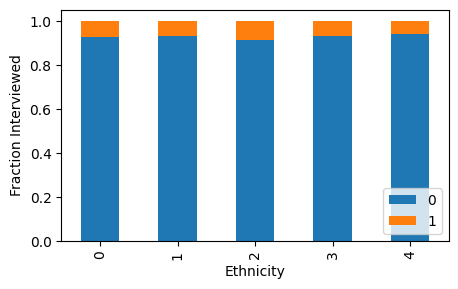

prediction         0         1
Gender                        
F           0.919044  0.080956
M           0.871157  0.128843
N/A         1.000000       NaN


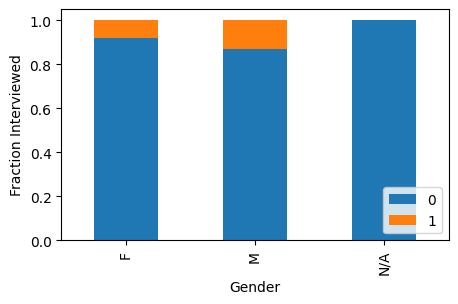

prediction         0         1
Disability                    
0           0.930618  0.069382
1           0.927774  0.072226
N/A         0.930618  0.069382


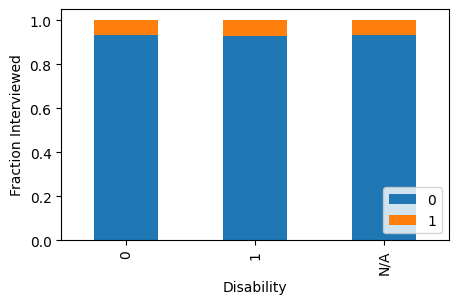

prediction                 0         1
Work authorization                    
0                   0.927448  0.072552
1                   0.931818  0.068182


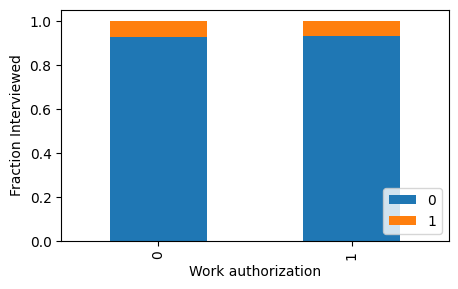

prediction             0         1
Veteran status                    
0               0.930665  0.069335
1               0.928248  0.071752
N/A             0.930031  0.069969


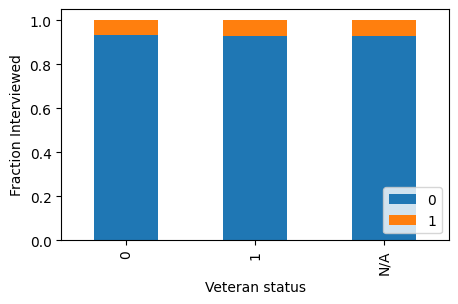

In [31]:
#EDA
#race
count_matrix = final.groupby(['Ethnicity', 'prediction']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

count_matrix_norm.plot(kind='bar', stacked=True, figsize=(5,3))
plt.ylabel('Fraction Interviewed')
plt.legend(loc=4)
plt.show()


#gender
count_matrix = final.groupby(['Gender', 'prediction']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

count_matrix_norm.plot(kind='bar', stacked=True, figsize=(5,3))
plt.ylabel('Fraction Interviewed')
plt.legend(loc=4)
plt.show()

#disability
count_matrix = final.groupby(['Disability', 'prediction']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

count_matrix_norm.plot(kind='bar', stacked=True, figsize=(5,3))
plt.ylabel('Fraction Interviewed')
plt.legend(loc=4)
plt.show()

#work authorization
count_matrix = final.groupby(['Work authorization', 'prediction']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

count_matrix_norm.plot(kind='bar', stacked=True, figsize=(5,3))
plt.ylabel('Fraction Interviewed')
plt.legend(loc=4)
plt.show()

#veteran
count_matrix = final.groupby(['Veteran status', 'prediction']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

count_matrix_norm.plot(kind='bar', stacked=True, figsize=(5,3))
plt.ylabel('Fraction Interviewed')
plt.legend(loc=4)
plt.show()

In [45]:
# Assuming 'final' is your dataframe with the data
count_matrix = final.groupby(['Gender', 'prediction']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1), axis=0)

count_matrix_norm = count_matrix_norm.rename(columns={0: "Not Interviewed", 1: "Interviewed"})
count_matrix_norm.head()

# #disability
count_matrix = final.groupby(['Disability', 'prediction']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm = count_matrix_norm.rename(columns={0: "Not Interviewed", 1: "Interviewed"})
count_matrix_norm = count_matrix_norm.rename(index={0: "No", 1: "Yes"})
count_matrix_norm.head()

#ethnicity
count_matrix = final.groupby(['Ethnicity', 'prediction']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm = count_matrix_norm.rename(columns={0: "Not Interviewed", 1: "Interviewed"})
count_matrix_norm = count_matrix_norm.rename(index={0: "White", 1: "Black", 2: "Native American", 3: "Asian", 4: "Ohter"})
count_matrix_norm.head()

#work authorization
count_matrix = final.groupby(['Work authorization', 'prediction']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm = count_matrix_norm.rename(columns={0: "Not Interviewed", 1: "Interviewed"})
count_matrix_norm = count_matrix_norm.rename(index={0: "No", 1: "Yes"})
count_matrix_norm.head()

#veteran
count_matrix = final.groupby(['Veteran status', 'prediction']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm = count_matrix_norm.rename(columns={0: "Not Interviewed", 1: "Interviewed"})
count_matrix_norm = count_matrix_norm.rename(index={0: "No", 1: "Yes"})
count_matrix_norm.head()


prediction,Not Interviewed,Interviewed
Veteran status,,
No,0.930665,0.069335
Yes,0.928248,0.071752
N/A,0.930031,0.069969


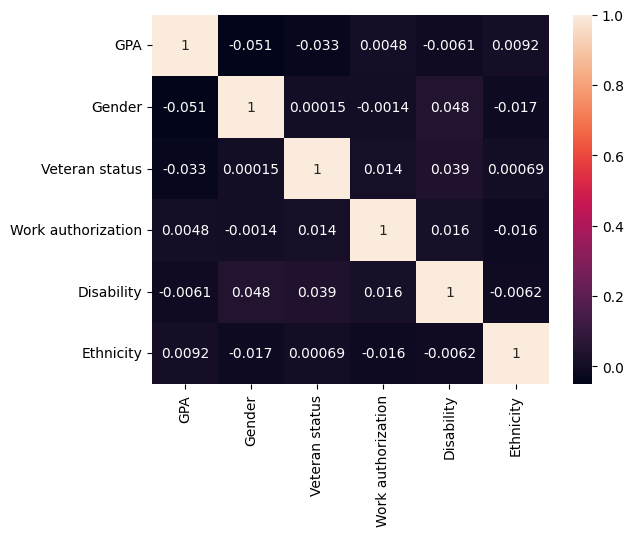

Correlation between variables and 'Gender':
GPA                  -0.050680
Gender                1.000000
Veteran status        0.000149
Work authorization   -0.001382
Disability            0.047533
Ethnicity            -0.017247
Name: Gender, dtype: float64
Correlation between variables and 'Ethnicity':
GPA                   0.009242
Gender               -0.017247
Veteran status        0.000687
Work authorization   -0.016077
Disability           -0.006226
Ethnicity             1.000000
Name: Ethnicity, dtype: float64
Correlation between variables and 'Disability':
GPA                  -0.006107
Gender                0.047533
Veteran status        0.038734
Work authorization    0.016029
Disability            1.000000
Ethnicity            -0.006226
Name: Disability, dtype: float64


In [10]:
#Proxies

final_copy = final.copy()

#reconvert N/A to acutal NA values
final_copy.replace('N/A', np.nan, inplace=True)

#convert F and M values to 1 and 0
final_copy['Gender'] = final_copy['Gender'].replace({'F': 1, 'M': 0})

corr_data = final_copy[["GPA", "Gender", "Veteran status", "Work authorization", "Disability", "Ethnicity"]]
corr = corr_data.corr()
sns.heatmap(corr, vmin=-1, vmax=1 annot = True)
plt.savefig('correlation_matrix.png', dpi=300)
plt.show()

# Print the results
print("Correlation between variables and 'Gender':")
gender_corr = corr['Gender']
print(gender_corr)

# Print the results
print("Correlation between variables and 'Ethnicity':")
ethnicity_corr = corr['Ethnicity']
print(ethnicity_corr)

# Print the results
print("Correlation between variables and 'Disability':")
disability_corr = corr['Disability']
print(disability_corr)

In [11]:
#Compute Independence
def independence(y_hat, group):
    # Set group labels
    group_1 = (group == 0)
    group_2 = (group == 1)
    # Get predictions for each group
    y_hat_1 = y_hat[group_1]
    y_hat_2 = y_hat[group_2]

    prob_a = np.mean(y_hat_1)
    prob_b = np.mean(y_hat_2)

    indep_measure = prob_b / prob_a  # Measure of independence
    return indep_measure

#switch 1 and 0 in Work authorization so it aligns with minority definition in spd
final_copy['Work authorization'] = final_copy['Work authorization'].replace({0: 1, 1: 0})

variables = ["Gender", "Veteran status", "Work authorization", "Disability"]
results = []
for var in variables:
    group = final_copy[var].to_numpy()
    y_hat = final_copy['prediction'].to_numpy()
    indep_measure = independence(y_hat, group)
    print(f'Independence for {var}: {indep_measure}')
    results.append({'Variable': var, 'Independence': indep_measure})
indep_results = pd.DataFrame(results)
indep_results.head()

Independence for Gender: 0.6283293614635173
Independence for Veteran status: 1.0348599993770828
Independence for Work authorization: 1.0640960595298494
Independence for Disability: 1.0410016510731976


,Variable,Independence
0,Gender,0.628329
1,Veteran status,1.034860
2,Work authorization,1.064096
3,Disability,1.041002


In [12]:
#Calculate Independence across multiple ethnicities
y_hat = final_copy['prediction'].to_numpy()
group_ethnicity = final_copy["Ethnicity"].to_numpy()

#compute independence across multiple groups
def independence_ethnicity(y_hat, group, group_a, group_b):
    is_group_a = (group == group_a)
    is_group_b = (group == group_b)

    y_hat_a = y_hat[is_group_a]
    y_hat_b = y_hat[is_group_b]
    prob_a = np.mean(y_hat_a)
    prob_b = np.mean(y_hat_b)

    indep_measure = prob_b / prob_a

    return indep_measure

# Loop through all combinations of ethnicities
code_book = ['White', 'Black', 'Native American', 'Asian American & Pacific Islander', 'Other']
ethnicities = []
for i in range(5):
    for j in range(i + 1, 5):
        independence_measure = independence_ethnicity(y_hat, group_ethnicity, i, j)
        print(f"Independence between {code_book[i]} and {code_book[j]}: {independence_measure:.3f}")
        ethnicities.append({'Group 1': code_book[i], 'Group 2': code_book[j], "Independence": independence_measure})
ethnicity_results = pd.DataFrame(ethnicities)
ethnicity_results.head(10)


Independence between White and Black: 0.955
Independence between White and Native American: 1.204
Independence between White and Asian American & Pacific Islander: 0.943
Independence between White and Other: 0.823
Independence between Black and Native American: 1.262
Independence between Black and Asian American & Pacific Islander: 0.988
Independence between Black and Other: 0.862
Independence between Native American and Asian American & Pacific Islander: 0.783
Independence between Native American and Other: 0.683
Independence between Asian American & Pacific Islander and Other: 0.872


,Group 1,Group 2,Independence
0,White,Black,0.954545
1,White,Native American,1.204489
2,White,Asian American & Pacific Islander,0.943442
3,White,Other,0.822500
4,Black,Native American,1.261845
5,Black,Asian American & Pacific Islander,0.988367
6,Black,Other,0.861667
7,Native American,Asian American & Pacific Islander,0.783271
8,Native American,Other,0.682862
9,Asian American & Pacific Islander,Other,0.871808


In [13]:
#Statistical Parity Difference
def spd(sensitive_attribute, dataset, predicted_labels, majority_class, minority_class):

    #create minority and majority dataframes
    a_minority = dataset[sensitive_attribute] == minority_class
    a_majority = dataset[sensitive_attribute] == majority_class
    #get predicted values for dataframes
    pred_minority = predicted_labels[a_minority]
    pred_majority = predicted_labels[a_majority]
    #calculate spd value
    spd_val = np.mean(pred_minority) - np.mean(pred_majority)
    # print(spd_val)
    return spd_val



In [14]:
#set majority and minority classes

variables = ["Gender", "Disability", "Veteran status", "Work authorization"]
results = []
for var in variables:
    minority = 1
    majority = 0
    # Ensure you call .to_numpy() to get the numpy array of the predictions
    predicted_labels = final_copy['prediction'].to_numpy()
    spd_result = spd(var, final_copy, predicted_labels, majority, minority)
    print(f'SPD for {var}: {spd_result:.3f}')
    results.append({'Variable': var, 'SPD': spd_result})

# Create a DataFrame from the results
spd_results = pd.DataFrame(results)
spd_results.head()

SPD for Gender: -0.048
SPD for Disability: 0.003
SPD for Veteran status: 0.002
SPD for Work authorization: 0.004


,Variable,SPD
0,Gender,-0.047887
1,Disability,0.002845
2,Veteran status,0.002417
3,Work authorization,0.004370


In [15]:
#SPD for ethnicities

# Function to compute SPD
def spd(sensitive_attribute, dataset, predicted_labels, majority_class, minority_class):
    # Create minority and majority dataframes
    a_minority = dataset[sensitive_attribute] == minority_class
    a_majority = dataset[sensitive_attribute] == majority_class
    # Get predicted values for dataframes
    pred_minority = predicted_labels[a_minority]
    pred_majority = predicted_labels[a_majority]
    # Calculate SPD value
    spd_val = np.mean(pred_minority) - np.mean(pred_majority)
    return spd_val

# Loop through all combinations of ethnicities

ethnicities = []
for i in range(5):
    for j in range(i + 1, 5):
        spd_value = spd('Ethnicity', final_copy, final_copy['prediction'], i, j)
        print(f'SPD between {code_book[i]} and {code_book[j]}: {spd_value:.3f}')
        ethnicities.append({'Group 1': code_book[i], 'Group 2': code_book[j], "SPD": spd_value})
ethnicity_results = pd.DataFrame(ethnicities)
ethnicity_results.head(12)

SPD between White and Black: -0.003
SPD between White and Native American: 0.015
SPD between White and Asian American & Pacific Islander: -0.004
SPD between White and Other: -0.013
SPD between Black and Native American: 0.018
SPD between Black and Asian American & Pacific Islander: -0.001
SPD between Black and Other: -0.009
SPD between Native American and Asian American & Pacific Islander: -0.019
SPD between Native American and Other: -0.027
SPD between Asian American & Pacific Islander and Other: -0.009


,Group 1,Group 2,SPD
0,White,Black,-0.003247
1,White,Native American,0.014606
2,White,Asian American & Pacific Islander,-0.004040
3,White,Other,-0.012679
4,Black,Native American,0.017853
5,Black,Asian American & Pacific Islander,-0.000793
6,Black,Other,-0.009432
7,Native American,Asian American & Pacific Islander,-0.018646
8,Native American,Other,-0.027285
9,Asian American & Pacific Islander,Other,-0.008639


We see that the statistical parity difference for gender is the furthest away from the target score of 0.

In [ ]:
#Compute Disparate Impact
def di(sensitive_attribute, dataset, predicted_labels, majority_class, minority_class):
    a_minority = dataset[sensitive_attribute]==minority_class
    a_majority = dataset[sensitive_attribute]==majority_class
    #get di value
    di_val = np.mean(predicted_labels[a_minority]) / np.mean(predicted_labels[a_majority])
    # print(di_val)
    return di_val

variables = ["Gender", "Disability", "Veteran status", "Work authorization"]
results = []
for var in variables:
    minority = 1
    majority = 0
    predicted_labels = final_copy['prediction'].to_numpy()
    di_result = di(var, final_copy, predicted_labels, majority, minority)
    print(f'DI for {var}: {di_result:.3f}')
    results.append({'Variable': var, 'DI': di_result})

di_results = pd.DataFrame(results)
di_results.head()

#ethnicity combos
for i in range (5):
  for j in range(i+1, 5):
    di_val = di("Ethnicity", final_copy, final_copy['prediction'], i, j)
    print(f'DI between {code_book[i]} and {code_book[j]}: {di_val:.3f}')

DI for Gender: 0.628
DI for Disability: 1.041
DI for Veteran status: 1.035
DI for Work authorization: 1.064
DI between White and Black: 0.955
DI between White and Native American: 1.204
DI between White and Asian American & Pacific Islander: 0.943
DI between White and Other: 0.823
DI between Black and Native American: 1.262
DI between Black and Asian American & Pacific Islander: 0.988
DI between Black and Other: 0.862
DI between Native American and Asian American & Pacific Islander: 0.783
DI between Native American and Other: 0.683
DI between Asian American & Pacific Islander and Other: 0.872


As expected, the disparate impact for gender is furthest away from 1.

In [30]:
#Compute Independence for NAs

def independence_na(y_hat, group):
  #set group labels
   group_1 = (group == 1)
   group_na = (group != group)

   y_hat_1 = y_hat[group_1]
   y_hat_na = y_hat[group_na]
  #  print(y_hat_1, y_hat_2)
  #np.mean to calculate probabilities
   prob_a = np.mean(y_hat_1)
   prob_b = np.mean(y_hat_na)  # P(Ŷ=1 | A=b)
   #print(prob_a)
   #print(prob_b)
   indep_measure = prob_b / prob_a # Calculate the independence measure

   return indep_measure

# group_gender = final_copy["Gender"].to_numpy()
# group_disability = final_copy["Disability"].to_numpy()
# group_veteran = final_copy["Veteran status"].to_numpy()

variables = ["Gender", "Disability", "Veteran status"]
results = []
for var in variables:
    group = final_copy[var].to_numpy()
    y_hat = final_copy['prediction'].to_numpy()
    indep_measure = independence_na(y_hat, group)
    print(f'Independence for {var}: {indep_measure}')
    results.append({'Variable': var, 'Independence (minority versus NA class)': indep_measure})

print(results)
indep_results = pd.DataFrame(results)
indep_results.head(10)


# print('independence between minority gender and NA gender', independence_na(y_hat, group_gender))
# print('independence between minority disability status and NA status', independence_na(y_hat, group_disability))
# print('independence between minority veteran status and NA status', independence_na(y_hat, group_veteran))



def independence_na_majority(y_hat, group):
  #set group labels
   group_0 = (group == 0)
   group_na = (group != group)

   y_hat_0 = y_hat[group_0]
   y_hat_na = y_hat[group_na]
  #np.mean to calculate probabilities
   prob_a = np.mean(y_hat_0)
   prob_b = np.mean(y_hat_na)  # P(Ŷ=1 | A=b)
   #print(prob_a)
   #print(prob_b)
   indep_measure = prob_b / prob_a # Calculate the independence measure

   return indep_measure

variables = ["Gender", "Disability", "Veteran status"]
majority_results = []
for var in variables:
    group = final_copy[var].to_numpy()
    y_hat = final_copy['prediction'].to_numpy()
    indep_measure = independence_na_majority(y_hat, group)
    print(f'Independence for {var}: {indep_measure}')
    majority_results.append({'Variable': var, 'Independence (majority versus NA class)': indep_measure})

print(majority_results)
indep_majority_results = pd.DataFrame(majority_results)
indep_majority_results.head(10)


# print('independence between majority gender and NA gender', independence_na(y_hat, group_gender))
# print('independence between majority disability status and NA status', independence_na(y_hat, group_disability))
# print('independence between majority veteran status and NA status', independence_na(y_hat, group_veteran))





Independence for Gender: 0.0
Independence for Disability: 0.9606132698916204
Independence for Veteran status: 0.9751406818934127
[{'Variable': 'Gender', 'Independence (minority versus NA class)': 0.0}, {'Variable': 'Disability', 'Independence (minority versus NA class)': 0.9606132698916204}, {'Variable': 'Veteran status', 'Independence (minority versus NA class)': 0.9751406818934127}]
Independence for Gender: 0.0
Independence for Disability: 1.0
Independence for Veteran status: 1.0091340854567854
[{'Variable': 'Gender', 'Independence (majority versus NA class)': 0.0}, {'Variable': 'Disability', 'Independence (majority versus NA class)': 1.0}, {'Variable': 'Veteran status', 'Independence (majority versus NA class)': 1.0091340854567854}]


,Variable,Independence (majority versus NA class)
0,Gender,0.000000
1,Disability,1.000000
2,Veteran status,1.009134
